# NLP Visualizations of Macbeth and Romeo and Juliet

Execute the following cell for important imports.

In [2]:
import requests
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to /Users/harvey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harvey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/harvey/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/harvey/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

Execute the following cell to get the text of "Macbeth" and "Romeo and Juliet" from [Project Gutenberg](https://www.gutenberg.org/) 

In [3]:
target_url = "https://www.gutenberg.org/files/1533/1533-0.txt"
response = requests.get(target_url)
macbeth_string = response.text
macbeth_string = macbeth_string.split('*** START OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[1]
macbeth_string = macbeth_string.split('*** END OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[0]
macbeth_string = macbeth_string.lower()

target_url = "https://www.gutenberg.org/files/1513/1513-0.txt"
response = requests.get(target_url)
r_j_string = response.text
r_j_string = r_j_string.split('*** START OF THE PROJECT GUTENBERG EBOOK 1513 ***')[1]
r_j_string = r_j_string.split('*** END OF THE PROJECT GUTENBERG EBOOK 1513 ***')[0]
r_j_scenes = [i.lower() for i in r_j_string.split('SCENE')[1:]]

You now have the following variables:
* `macbeth_string`: this string contains the full text of "Macbeth"
* `r_j_string`: this string contains the full text of "Romeo and Juliet"
* `r_j_scenes`: the text from each scene of "Romeo and Juliet" is included in this Python list, with one scene per list item

Make two new variables:
* a Python list of stopwords
* a variable for using VADER's SentimentIntensityAnalyzer

In [4]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words("english"))
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

## Macbeth

Make a list of the words in Macbeth by tokenizing `macbeth_string`:

In [5]:
words = word_tokenize(macbeth_string)

Next, make a list of positive words and a list of negative words using the `polarity_scores` method of VADER's SentimentIntensityAnalyzer.  To do this:
* Write a for loop that iterates over your Macbeth word list
  * If the compound score of a word is positive, add the word to the positive-word list
  * If the compound score of a word is negative, add the word to the negative-word list
  * If the compound score is 0, the word should not be added to either list

In [6]:
positive_words, negative_words = [], []
for word in words:
  sentiment = sentiment_analyzer.polarity_scores(word)["compound"] # -1 means neg, 0 means neutral, 1 means positive
  if sentiment > 0:
    positive_words.append(word)
  elif sentiment < 0:
    negative_words.append(word)

1. Find the 15 most common negative words in Macbeth and the 15 most common positive words
    * Note that if you have a list variable called `mylist`, you can get the frequencies of words in `mylist` by using `nltk.FreqDist(mylist)`, and you can get the `n` most common words with `nltk.FreqDist(mylist).most_common(n)`.
2. Make a horizontal bar plot similar to the plots in the following image
3. Comment on similarities and differences to the Macbeth plot below

(Plot taken from a [2018 post by Peer Chirstensen](https://web.archive.org/web/20230129014418/https://peerchristensen.netlify.app/post/fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies/))

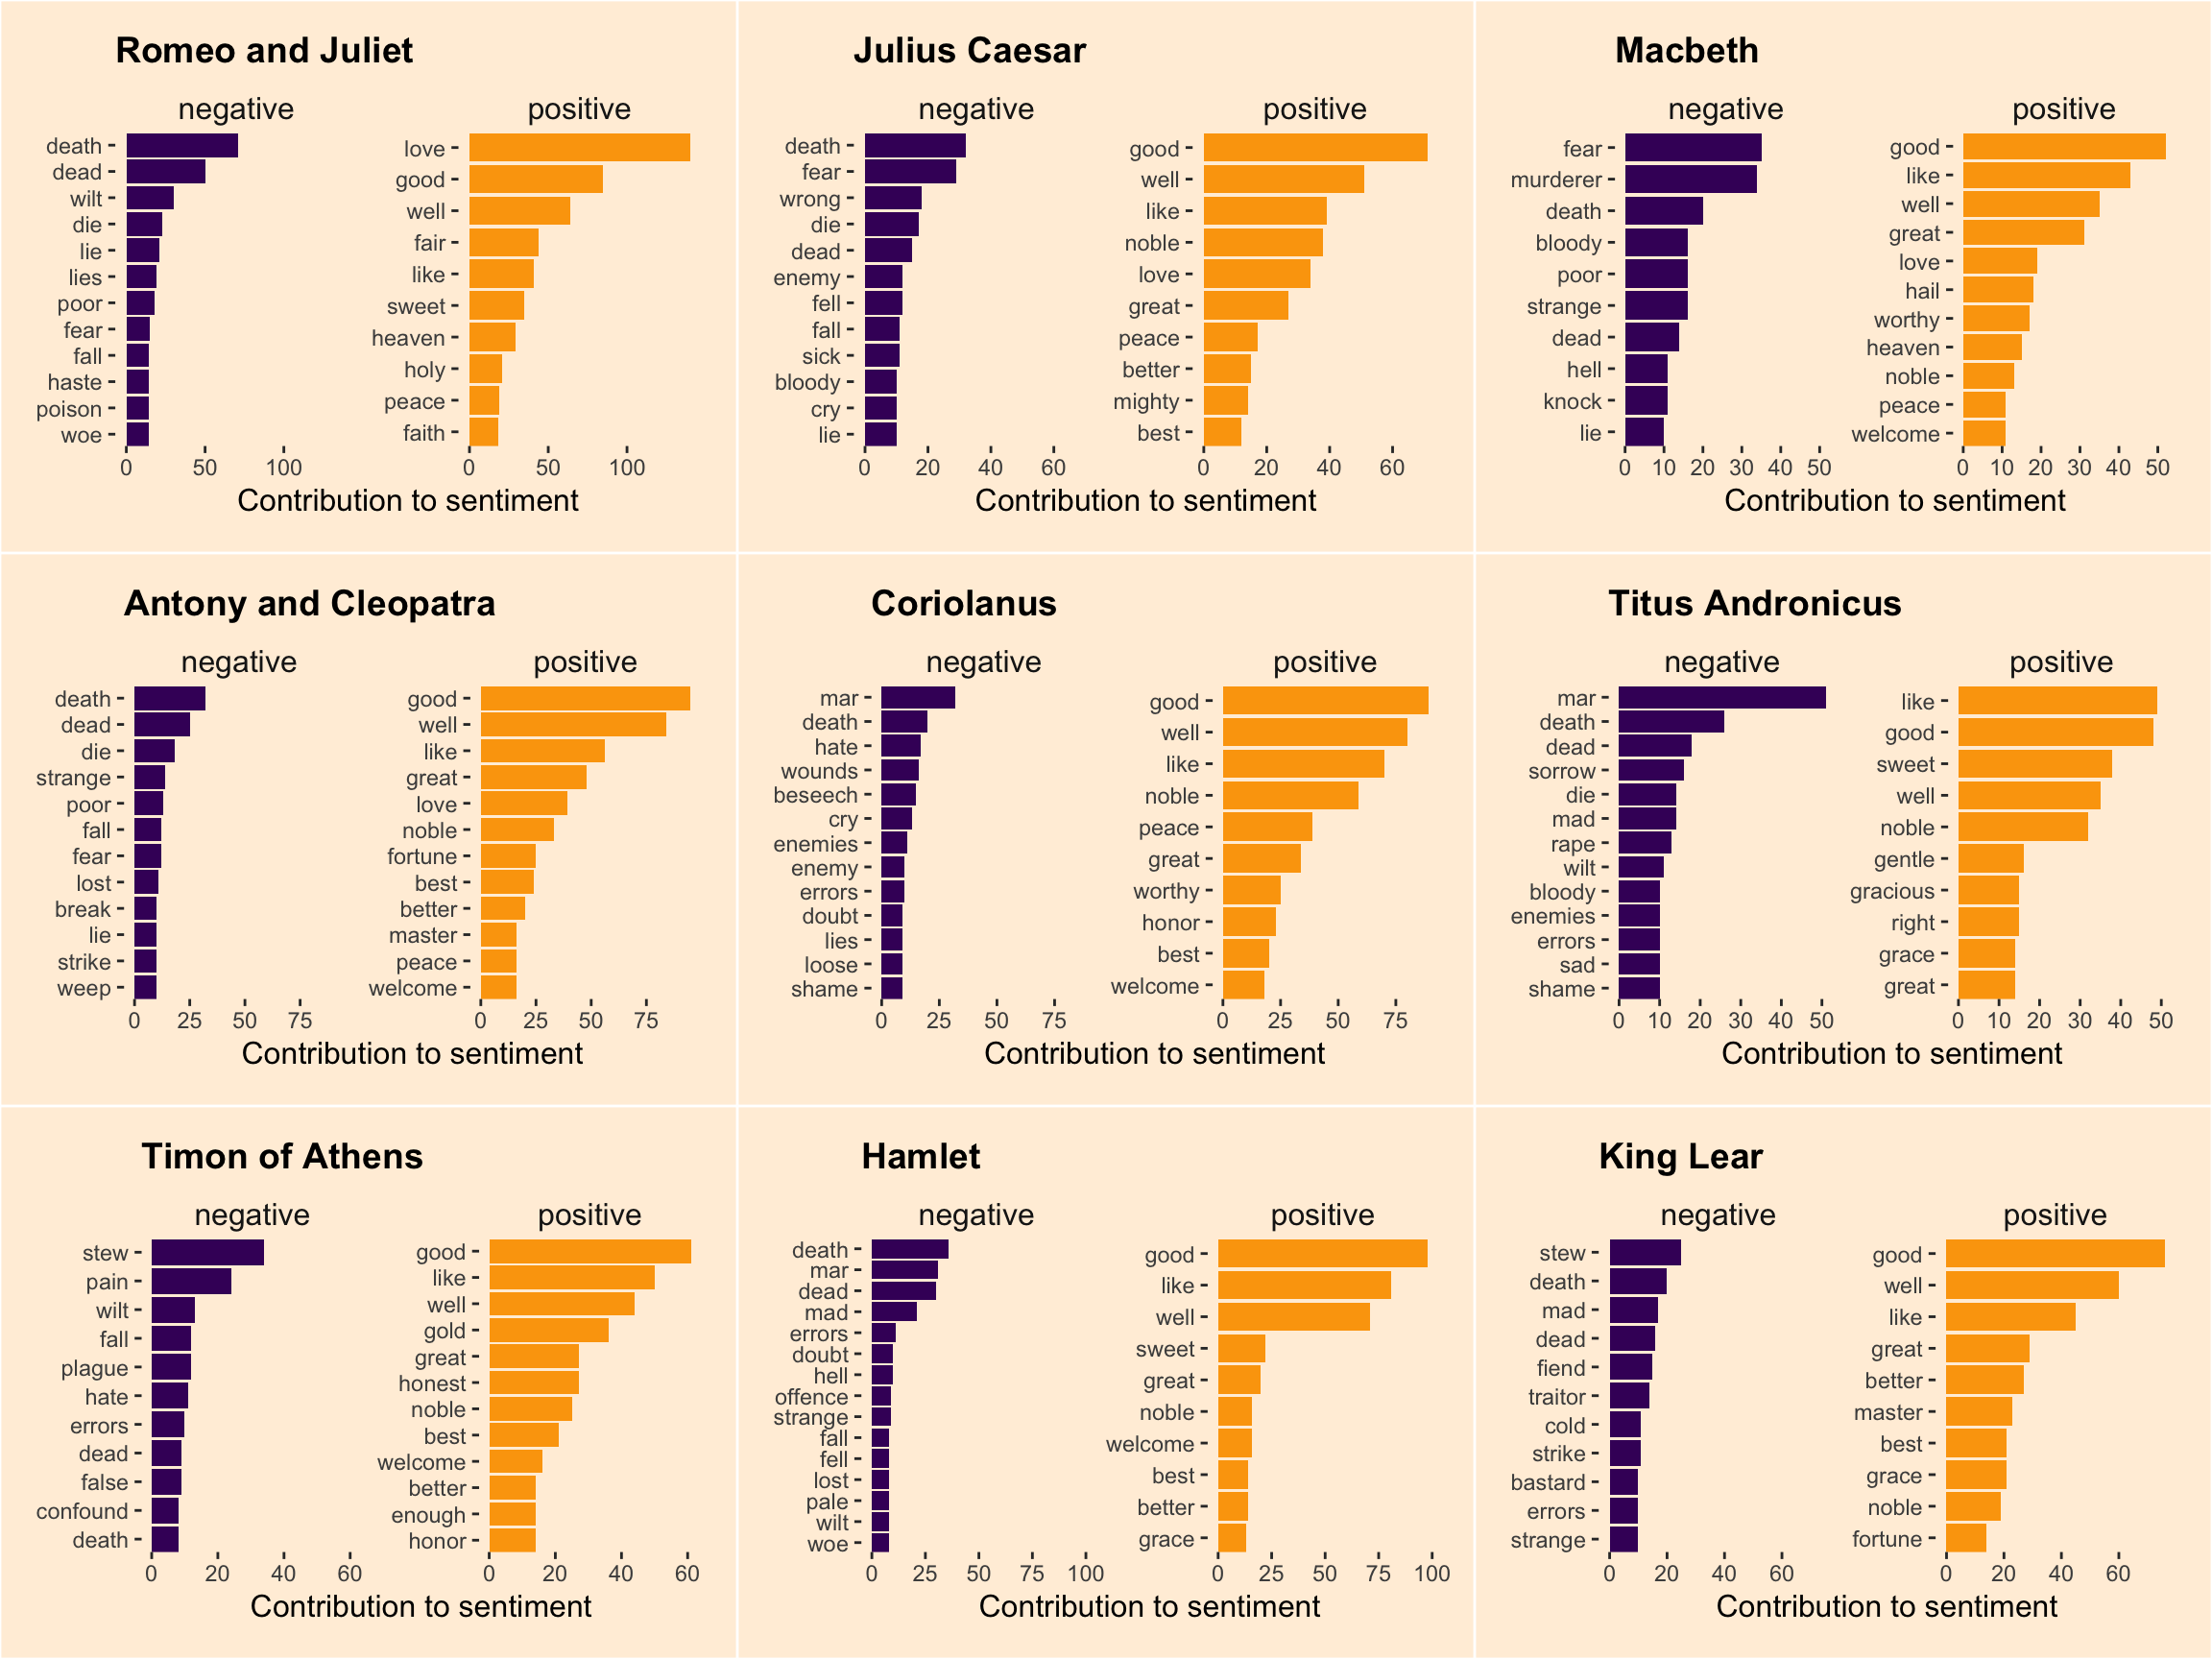

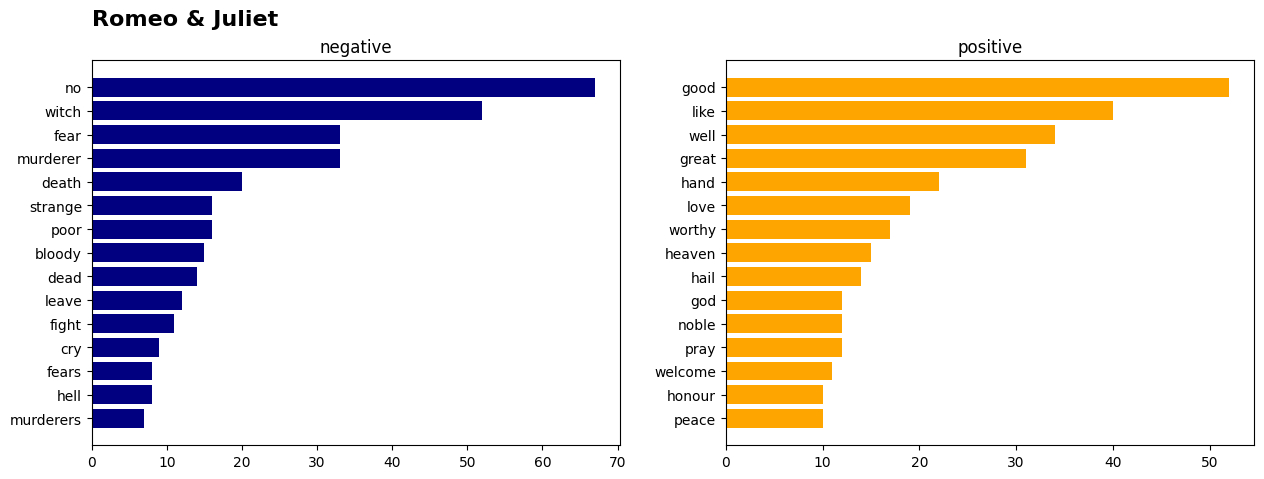

In [7]:
common_positive = nltk.FreqDist(positive_words).most_common(15)
common_negative = nltk.FreqDist(negative_words).most_common(15)
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

axs[0].barh(y=[word for word, freq in common_negative][::-1], width=[freq for word, freq in common_negative][::-1], color="navy")
axs[0].set_title("negative")
axs[1].barh(y=[word for word, freq in common_positive][::-1], width=[freq for word, freq in common_positive][::-1], color="orange")
axs[1].set_title("positive")
fig.text(0.125, 0.95, 'Romeo & Juliet', fontsize=16, fontweight='bold')
plt.show()

Enter comments here.

The word list we created from Macbeth did not have the stopwords removed.
* Repeat the above analysis, but do so for a list of Macbeth words in which the stopwords have been removed.
* What changes?

848 850
['no']
[]


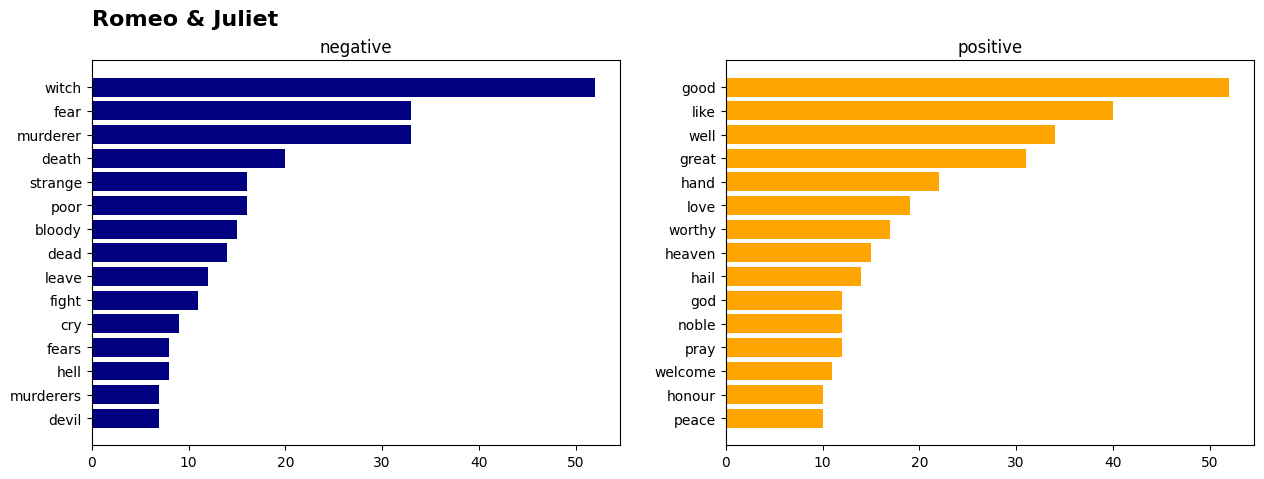

In [13]:
filtered_words = [word for word in words if word not in stopwords_set]
filtered_positive_words, filtered_negative_words = [], []
for word in filtered_words:
  sentiment = sentiment_analyzer.polarity_scores(word)["compound"] # -1 means neg, 0 means neutral, 1 means positive
  if sentiment > 0:
    filtered_positive_words.append(word)
  elif sentiment < 0:
    filtered_negative_words.append(word)


print(len(filtered_positive_words), len(positive_words))
print([word for word, freq in common_negative if word not in filtered_negative_words])
print([word for word, freq in common_positive if word not in filtered_positive_words])

# visualize top positive and negative words in filtered words
filtered_common_positive = nltk.FreqDist(filtered_positive_words).most_common(15)
filtered_common_negative = nltk.FreqDist(filtered_negative_words).most_common(15)
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

axs[0].barh(y=[word for word, freq in filtered_common_negative][::-1], width=[freq for word, freq in filtered_common_negative][::-1], color="navy")
axs[0].set_title("negative")
axs[1].barh(y=[word for word, freq in filtered_common_positive][::-1], width=[freq for word, freq in filtered_common_positive][::-1], color="orange")
axs[1].set_title("positive")
fig.text(0.125, 0.95, 'Romeo & Juliet', fontsize=16, fontweight='bold')
plt.show()

### comments ###
no is the most common negative word. However it is filtered out by our stopwords!
other than that there is no change in visualization.

* Repeat the above analysis one more time -> in addition to removing the stopwords, use the Porter stemmer to get a list of stemmed words before you calculate the word frequencies.
* What words in your plot have now been counted together?

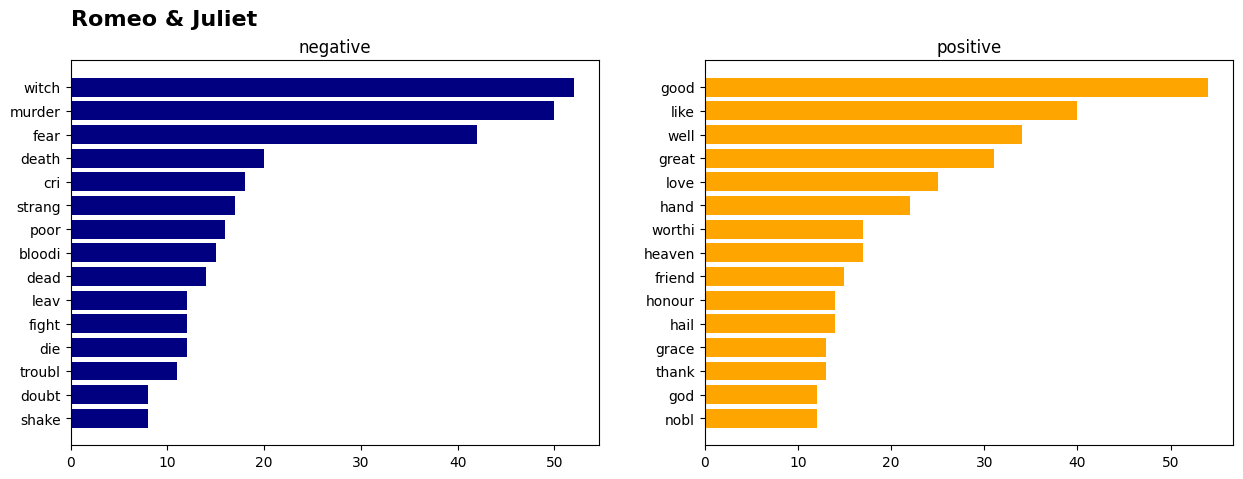

In [16]:
stemmer = PorterStemmer()
stemmed_positive_words = [stemmer.stem(word) for word in filtered_positive_words]
stemmed_negative_words = [stemmer.stem(word) for word in filtered_negative_words]

stemmed_common_positive = nltk.FreqDist(stemmed_positive_words).most_common(15)
stemmed_common_negative = nltk.FreqDist(stemmed_negative_words).most_common(15)
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

axs[0].barh(y=[word for word, freq in stemmed_common_negative][::-1], width=[freq for word, freq in stemmed_common_negative][::-1], color="navy")
axs[0].set_title("negative")
axs[1].barh(y=[word for word, freq in stemmed_common_positive][::-1], width=[freq for word, freq in stemmed_common_positive][::-1], color="orange")
axs[1].set_title("positive")
fig.text(0.125, 0.95, 'Romeo & Juliet', fontsize=16, fontweight='bold')
plt.show()

ntlk is better at analyzing unstemmed words' sentiments, so I stemmed words AFTER getting a list of positive and negative words.

## Romeo and Juliet

We are now going to plot the evolution of sentiment in Romeo and Juliet.

This is motivated by the following plot (also from the afore-mentioned link):

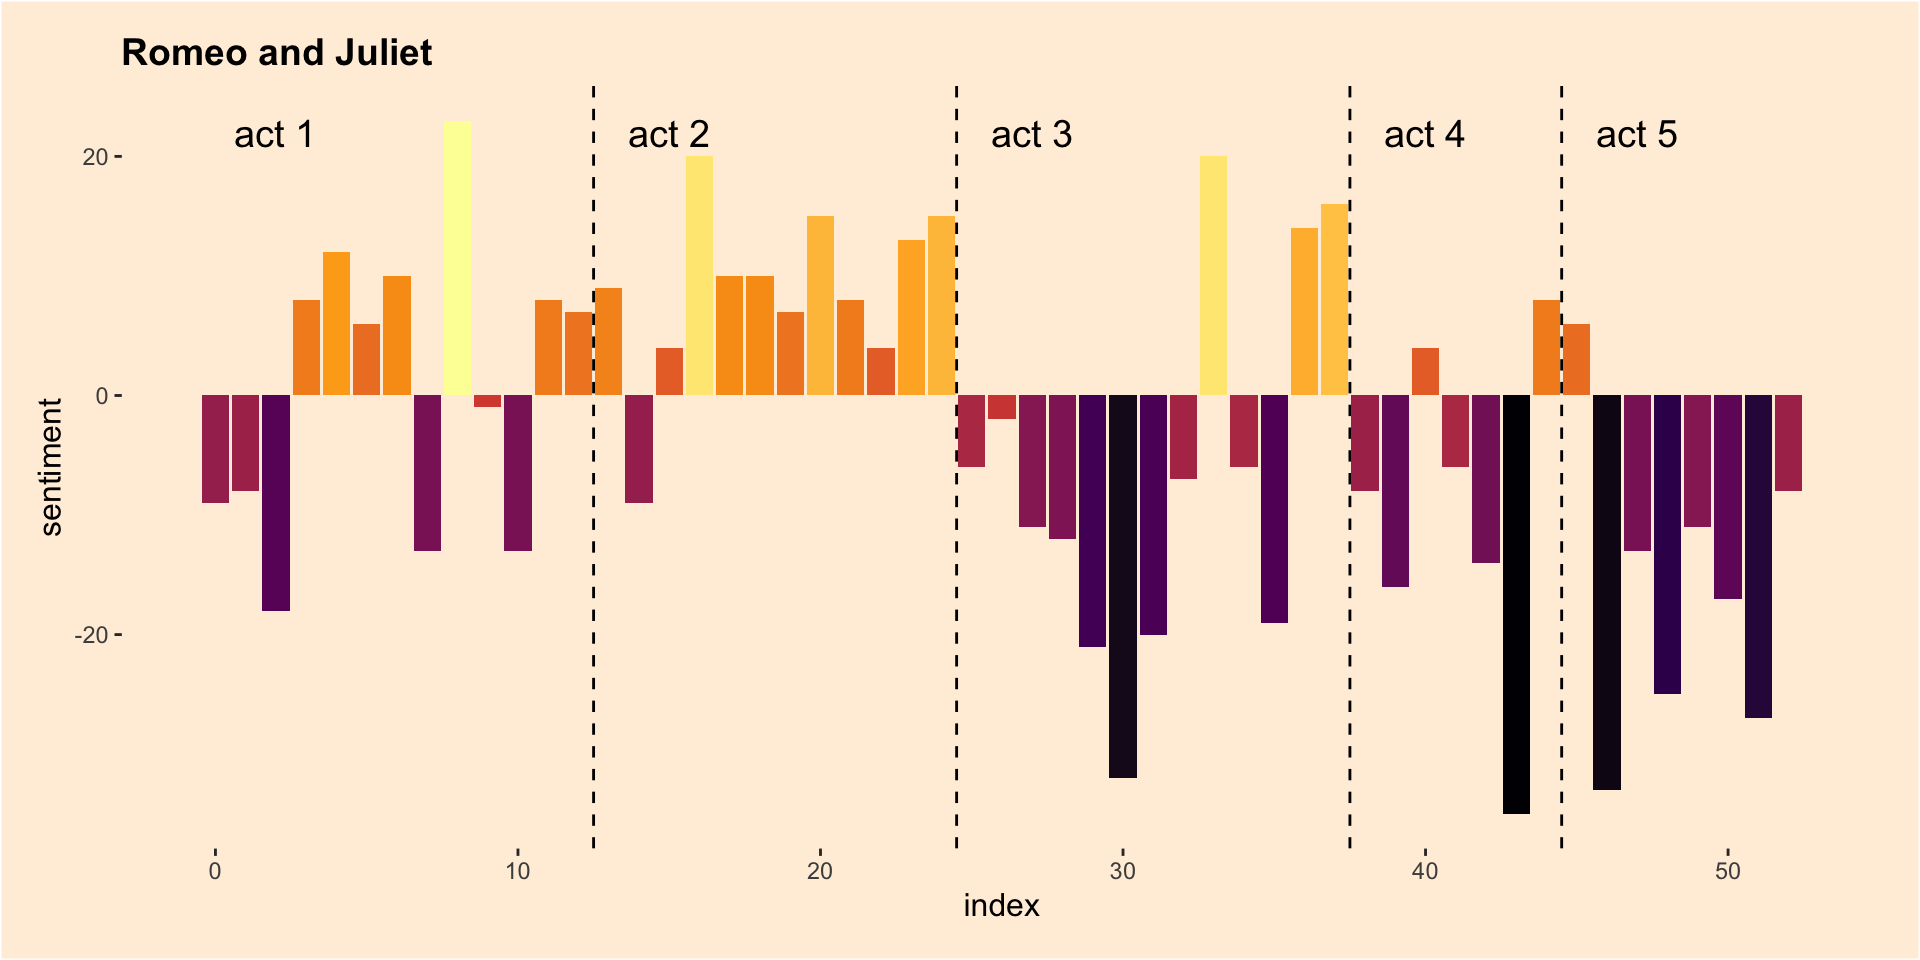

We are going to make a couple different plots.

First:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Sum the compound sentiment scores of every word in the scene (using VADER's SentimentIntensityAnalyser's polarity_scores method to get the compound sentiment score for each word).
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Comment on its resemblance to the Romeo and Juliet plot above.

25


<BarContainer object of 25 artists>

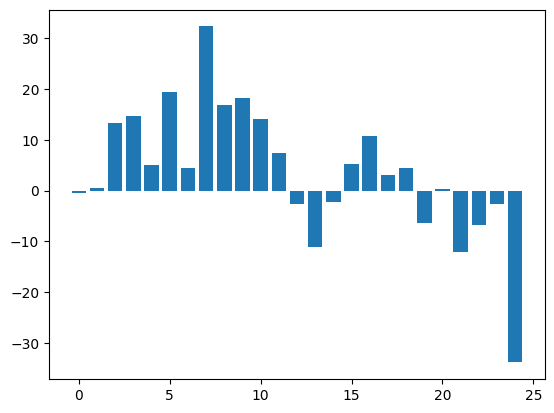

In [28]:
scene_total_sentiments = []
for i, scene in enumerate(r_j_scenes):
  scene_words = word_tokenize(scene)
  scene_total_sentiment = sum([sentiment_analyzer.polarity_scores(word)["compound"] for word in scene_words])
  scene_total_sentiments.append(scene_total_sentiment)
plt.bar(list(range(len(r_j_scenes))), scene_total_sentiments)

This plot captures the sentiment trend in Romeo and Juliet, except it underestimated the negativity of act3 and act5.

Second:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 to the score for each positive word (compound_score > 0) and substracting 1 from the score for each negative word (compound_score < 0)**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous method of calculating the total scene sentiment score?

<BarContainer object of 25 artists>

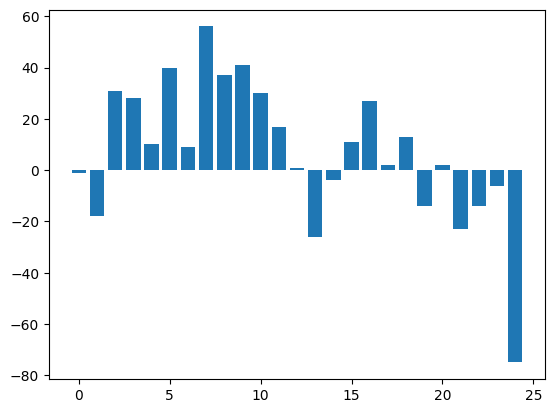

In [29]:
scene_total_sentiments_2 = []
for i, scene in enumerate(r_j_scenes):
  scene_words = word_tokenize(scene)
  scene_total_sentiment = 0
  for word in scene_words:
    sentiment = sentiment_analyzer.polarity_scores(word)["compound"]
    if sentiment < 0:
      scene_total_sentiment -= 1
    elif sentiment > 0:
      scene_total_sentiment += 1
  scene_total_sentiments_2.append(scene_total_sentiment)
plt.bar(list(range(len(r_j_scenes))), scene_total_sentiments_2)

Using this method accentuates sentiment score for both positive and negative scenes; the overall trend stays the same.

Next, we are going to use a new lexicon to assess positive and negative word sentiment, the opinion_lexicon (https://www.nltk.org/api/nltk.corpus.reader.opinion_lexicon.html)

Execute the following cell to make a set of positive words and a set of negative words.

In [30]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

The following cell is an example of checking whether a word is positive or negative according to this opinion lexicon.  Try it out with a couple words.

In [31]:
testword = 'love'
if testword in positive_words:
    print(testword + ' is positive')
elif testword in negative_words:
    print(testword + ' is negative')
else:
    print(testword + ' is neither positive nor negative')

love is positive


Third plot:

* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

<BarContainer object of 25 artists>

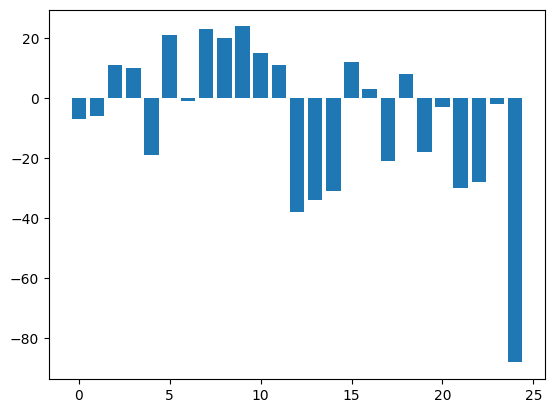

In [32]:
scene_total_sentiments_3 = []
for i, scene in enumerate(r_j_scenes):
  scene_words = word_tokenize(scene)
  scene_total_sentiment = 0
  for word in scene_words:
    if word in negative_words:
      scene_total_sentiment -= 1
    elif word in positive_words:
      scene_total_sentiment += 1
  scene_total_sentiments_3.append(scene_total_sentiment)
plt.bar(list(range(len(r_j_scenes))), scene_total_sentiments_3)

This plot evaluates all scenes to be more negative than the previous two plots.
Especially, scenes in act1 act2 and act3 are evaluated to be much more negative.

Fourth plot:

* Take the entire string of Romeo and Juliet (`r_j_string`) and tokenize it into words.
* Calculate a total sentiment score for each consecutive group of 500 words.
  * Do this as immediately above by adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.
* Make a bar plot that has the group number (0,1,2,3,...) on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

[-4, -11, -11, -7, 8, 11, 12, -6, 1, -5, 19, -7, -16, 8, -3, 5, 2, 3, -4, 15, 4, 3, 6, 5, 9, 12, -4, 7, 8, 7, -2, 4, -14, -11, -9, -16, -15, -28, -8, -10, 11, 7, -7, -20, 9, 6, 3, -4, -14, -4, 9, -20, -3, -32, -1, 3, -9, -22, -12, -16, -4, -11, -20, -17, -5]


<BarContainer object of 65 artists>

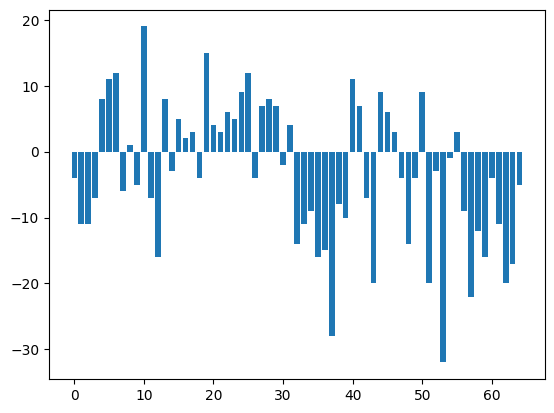

In [41]:
r_j_words = word_tokenize(r_j_string)
scene_total_sentiments_4 = []

for i in range(0, len(r_j_words), 500):
  scene_total_sentiment = 0
  for j in range(i, i + 500):
    if j >= len(r_j_words):
      break
    if r_j_words[j] in positive_words:
      scene_total_sentiment += 1
    if r_j_words[j] in negative_words:
      scene_total_sentiment -= 1
  scene_total_sentiments_4.append(scene_total_sentiment)
print(scene_total_sentiments_4)
plt.bar(list(range(65)), scene_total_sentiments_4)

this is just a more detailed breakdown of the previous chart. I like this chart because it shows a more detailed breakdown of where exactly in the book is the plot more negative and positive, for isntance between group 60 and end the chart is not as dramatic as the previous chart.

What method would you use if you had to report on the evolution of sentiment in Romeo and Juliet to an audience of Shakespearian academics?

I would use te last chart, because it shows a more detailed breakdown, while using a good bad and good word list.